# Basic Imports and Installations

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
!pip install PyPDF2
!pip install flair
!pip install bert-extractive-summarizer
!pip install torch
!pip install sumy
!pip install afinn
!pip install rouge
!pip uninstall pandas
!pip install pandas
# !pip3 install --upgrade pandas

Found existing installation: pandas 1.3.4
Uninstalling pandas-1.3.4:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas-1.3.4.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas/*
Proceed (y/n)? y
  Successfully uninstalled pandas-1.3.4
  Using cached pandas-1.3.4-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

import PyPDF2
import datetime as date
import re
import string
import spacy
import nltk
import math
import torch
# import json

from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS
from heapq import nlargest
from string import punctuation
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk import PorterStemmer
from afinn import Afinn
from rouge import Rouge
from wordcloud import WordCloud, STOPWORDS

from gensim.summarization import summarize, keywords
# import os
from sumy.nlp.stemmers import Stemmer
from sumy.summarizers.lex_rank import LexRankSummarizer 
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.utils import get_stop_words
#from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config
import pickle
# import requests
from textblob import TextBlob

In [2]:
# creating a pdf file object to read pdf file
pdf_file_obj = open('/content/gdrive/MyDrive/Project/Ecommerce_Business_Guide.pdf','rb')
# pdf_file_obj = open('Ecommerce_Business_Guide.pdf','rb')

In [3]:
#creating pdf filereader object
pdf_reader = PyPDF2.PdfFileReader(pdf_file_obj)

In [4]:
def displayInfoBook(pdf_reader):
    information = pdf_reader.getDocumentInfo()
    print("Author:",information.author)
    print("Creator:",information.creator)
    print("Producer:",information.producer)
    print("Subject:",information.subject)
    print("Title:",information.title)
    print("Number of Pages:",pdf_reader.getNumPages())
      
displayInfoBook(pdf_reader)

Author: None
Creator: Adobe InDesign CS5.5 (7.5.3)
Producer: Adobe PDF Library 9.9
Subject: None
Title: None
Number of Pages: 15


In [5]:
no_pages = pdf_reader.getNumPages()

start = date.datetime.now()
corpus = ''
for i in range(0, no_pages):
    page = pdf_reader.getPage(i)
    corpus += page.extractText()

end = date.datetime.now()
pdf_file_obj.close()

print("Time taken =",end-start)
print("length of corpus =",len(corpus))
print(corpus)

ds                   = pd.DataFrame()
ds['Corpus Length']  = pd.DataFrame([[len(corpus)]])
ds['Corpus']         = pd.DataFrame([[corpus]])

Time taken = 0:00:00.694742
length of corpus = 21932
Complete Guide 
to Building an 
E-Commerce Business 
CONTENT AND SOCIAL MEDIA      MARKETINGFOR SMALL BUSINESSESwww.digitalsherpa.com
Advancement in technology and an increasingly savvy consumer market has made e-commerce a powerful force in the global economy. With more people opting to shop on the Internet, SMBs take steps to reach this market by setting up online shops. As more payment services providers get into the market, setting up an e-commerce website is no longer cost-prohibitive. Today, anyone with basic web skills can set up a robust e-commerce site within a few days and without breaking the bank.One of the major things that buyers are concerned about when shopping online is their security. With major online fraud cases being reported around the world, you cannot blame consumers for being extra cautious. Therefore, when setting up an e-commerce store, you need to plan carefully and keep security at the forefront of your i

# Data Cleaning/ Preprocessing

In [6]:
corpus = corpus.replace("'s",'') # replaces apostrophe s
corpus = corpus.replace('\n','') # replaces newline character
corpus = re.sub(r'\([^()]*\)','',corpus) # removes text inside brackets including brackets
corpus = re.sub(r'(http|https|www)\S+', '', corpus) # replaces www.digitalsherpa.com,http://www.articlesbase.com/technology
corpus = re.sub(r'\<.+\>','',corpus) # replaces <link rel=ﬂcanonicalﬂ href=ﬂﬂ />
corpus = re.sub(r'\s+',' ',corpus) # replaces more than 2 spaces with 1 space
corpus = corpus.lower() # converts the text to lower

ds['Cleaned Corpus']         = pd.DataFrame([[corpus]]) 
ds['Cleaned Corpus length']  = pd.DataFrame([[len(corpus)]])

print("corpus length =",len(corpus))
corpus

corpus length = 21309


'complete guide to building an e-commerce business content and social media marketingfor small businesses in technology and an increasingly savvy consumer market has made e-commerce a powerful force in the global economy. with more people opting to shop on the internet, smbs take steps to reach this market by setting up online shops. as more payment services providers get into the market, setting up an e-commerce website is no longer cost-prohibitive. today, anyone with basic web skills can set up a robust e-commerce site within a few days and without breaking the bank.one of the major things that buyers are concerned about when shopping online is their security. with major online fraud cases being reported around the world, you cannot blame consumers for being extra cautious. therefore, when setting up an e-commerce store, you need to plan carefully and keep security at the forefront of your installation.with that said, this guide will take you from marketing. let™s get started.the pl

In [7]:
#dataset
ds

,Corpus Length,Corpus,Cleaned Corpus,Cleaned Corpus length
0,21932,Complete Guide \nto Building an \nE-Commerce B...,complete guide to building an e-commerce busin...,21309


# Exploratory Data Analysis(EDA)

#### Using Spacy & NLTK

In [8]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [9]:
#creating list of sentences
list_sentences = sent_tokenize(corpus)
print("Total no of sentences = ",len(list_sentences),"\n")
list_10 = list_sentences[0:10]
list_10

Total no of sentences =  169 



['complete guide to building an e-commerce business content and social media marketingfor small businesses in technology and an increasingly savvy consumer market has made e-commerce a powerful force in the global economy.',
 'with more people opting to shop on the internet, smbs take steps to reach this market by setting up online shops.',
 'as more payment services providers get into the market, setting up an e-commerce website is no longer cost-prohibitive.',
 'today, anyone with basic web skills can set up a robust e-commerce site within a few days and without breaking the bank.one of the major things that buyers are concerned about when shopping online is their security.',
 'with major online fraud cases being reported around the world, you cannot blame consumers for being extra cautious.',
 'therefore, when setting up an e-commerce store, you need to plan carefully and keep security at the forefront of your installation.with that said, this guide will take you from marketing.',
 

In [10]:
#Named entity recognition for sentences between 80 to 88
ner = spacy.load('en_core_web_sm')

for i in range(80,88):
    one_sent = list_sentences[i]
    doc_block = ner(one_sent)
    displacy.render(doc_block, style='ent',  jupyter=True)    

In [11]:
#Named entity recognition for entire text

colNames = ['TEXT', 'LABEL', 'MEANING'] 
Entities_table = pd.DataFrame() #initialising dataframe

ner = spacy.load('en_core_web_sm')
ner_data = ner(corpus)
for word in ner_data.ents:
    varLabelValue =  word.label_
    varLabelMeaning = spacy.explain(varLabelValue)
    Entities_table = Entities_table.append(pd.DataFrame(data=[[word.text, word.label_, varLabelMeaning]],
                                                        columns = colNames))
    #print(word.text, word.label_, word.lemma_)
    
    
Entities_table.reset_index(drop=True)

,TEXT,LABEL,MEANING
0,today,DATE,Absolute or relative dates or periods
1,a few days,DATE,Absolute or relative dates or periods
2,™,CARDINAL,Numerals that do not fall under another type
3,three,CARDINAL,Numerals that do not fall under another type
4,google analytics,ORG,"Companies, agencies, institutions, etc."
5,™,CARDINAL,Numerals that do not fall under another type
6,s,PRODUCT,"Objects, vehicles, foods, etc. (not services)"
7,™s,PRODUCT,"Objects, vehicles, foods, etc. (not services)"
8,name.if,PRODUCT,"Objects, vehicles, foods, etc. (not services)"
9,more than $10,MONEY,"Monetary values, including unit"


* Text: The original word text.
* Lemma: The base form of the word.
* POS: The simple UPOS part-of-speech tag.
* Tag: The detailed part-of-speech tag.
* Dep: Syntactic dependency, i.e. the relation between tokens.
* is alpha: Is the token an alpha character?
* is stop: Is the token part of a stop list, i.e. the most common words of the language?

In [12]:
# POS and Dependency on entire corpus (string)
#creating table with all values
#creating noun and verb dictionary with key as text and values as their frequency

colnames = ['TEXT', 'LEMMA', 'POS','TAGS','DEP','ALPHA','STOP']
tags_pos_table = pd.DataFrame()

noun_frequencies = {} # dictionary intialization for noun
verb_frequencies = {} # dictionary intialization for verb

nlp = spacy.load('en_core_web_sm')
ner_data = nlp(corpus)
for token in ner_data:
    tags_pos_table = tags_pos_table.append(pd.DataFrame(
        data=[[token.text,token.lemma_,token.pos_, token.tag_, token.dep_,token.is_alpha,token.is_stop]],
                         columns = colnames))
        #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,token.is_alpha, token.is_stop)
    
    #create dictionary of noun frequencies
    if token.pos_ == 'NOUN':
        if token.text not in noun_frequencies.keys():
            noun_frequencies[token.text] = 1
        else:    
            noun_frequencies[token.text] +=1 
    
    #creates dictionary of verb frequencies        
    if token.pos_ == 'VERB':
        if token.text not in verb_frequencies.keys():
            verb_frequencies[token.text] = 1
        else:    
            verb_frequencies[token.text] +=1                        
                
tags_pos_table.reset_index(drop=True, inplace=True)
print(tags_pos_table.shape)
tags_pos_table.head(20)


(3945, 7)


,TEXT,LEMMA,POS,TAGS,DEP,ALPHA,STOP
0,complete,complete,ADJ,JJ,amod,True,False
1,guide,guide,NOUN,NN,ROOT,True,False
2,to,to,ADP,IN,prep,True,True
3,building,build,VERB,VBG,pcomp,True,False
4,an,an,DET,DT,det,True,True
5,e,e,ADJ,JJ,compound,True,False
6,-,-,PUNCT,HYPH,punct,False,False
7,commerce,commerce,NOUN,NN,compound,True,False
8,business,business,NOUN,NN,compound,True,False
9,content,content,NOUN,NN,dobj,True,False


In [13]:
# converting noun and verb dictionary to dataframe for sorting and plotting

list_noun_key = list(noun_frequencies.keys()) #converts dictionary keys to list of keys
list_noun_val = list(noun_frequencies.values()) # converts dictionary values to list of values
list_verb_key = list(verb_frequencies.keys())
list_verb_val = list(verb_frequencies.values())

# creating table for noun words frequency
noun_table = pd.DataFrame()
noun_table['noun']       = list_noun_key
noun_table['noun_count'] = list_noun_val
noun_table.sort_values(by='noun_count', ascending=False, inplace=True)
noun_table_10            = noun_table.head(10)

#creating table for verb word frequency
verb_table               = pd.DataFrame()
verb_table['verb']       = list_verb_key
verb_table['verb_count'] = list_verb_val
verb_table.sort_values(by='verb_count', ascending=False, inplace=True)
verb_table_10            = verb_table.head(10)

In [14]:
noun_table_10

,noun,noun_count
37,store,38
53,customers,28
151,products,21
1,commerce,19
22,website,19
40,marketing,16
27,site,14
2,business,13
54,account,13
153,product,12


In [15]:
fig = px.bar(noun_table_10, x='noun', y='noun_count',
             color='noun_count',
             height=400, title='Top 10 most common nouns')
fig.show()

In [16]:
verb_table_10

,verb,verb_count
9,can,51
18,will,34
40,using,20
14,need,17
38,use,15
53,make,15
43,should,15
60,hosted,13
47,want,12
80,may,10


In [17]:
fig = px.bar(verb_table_10, x='verb', y='verb_count',
             color='verb_count',
             height=400, title='Top 10 most common verbs',
             color_continuous_scale=px.colors.diverging.Tealrose,                          
            )
fig.show()

In [18]:
# from nltk
stop_words = set(stopwords.words('english'))
#stop_words.add('testingstopwordsaddition')
type(stop_words)
print(len(stop_words))
print(stop_words)

179
{'didn', 'y', 'be', 'during', 'why', 'only', "you're", "doesn't", 'how', 'your', 'has', 'being', 'at', 'should', 'on', 'so', 'off', "shan't", 'of', 'other', 'than', 'their', 'what', 'against', 'each', "it's", 'doesn', 'they', 'a', 'between', 'own', 'we', 'then', 'mustn', 'and', 'haven', 'themselves', 'too', 'hasn', 'out', 'both', "won't", 'those', 'can', 'or', "needn't", 'yourselves', 'before', "mustn't", 'no', 'wouldn', 'some', 'he', 'hers', 'won', 'theirs', 'as', 'by', "she's", 'shan', 'weren', 'these', 'were', 'while', 'needn', 'for', 'did', "hadn't", 'm', 'once', 'where', "don't", 'more', 'to', 'if', "weren't", 'll', 'aren', 'ours', 'not', 'them', 'does', 'doing', 'over', "wasn't", 'further', 'itself', 'this', 'wasn', 'shouldn', 'isn', "wouldn't", 'it', 'above', 'until', "you'd", 'couldn', 'my', 'having', 'which', "didn't", 'his', 've', 'don', 'she', 'because', 'with', 'our', 'any', 'd', 'will', "should've", 'into', "hasn't", 'most', 'up', 'few', "couldn't", 'is', 'who', "that'

In [19]:
#creating word_token from sentences
print("corpus length =",len(corpus))
word_tokens = word_tokenize(corpus)
print("lenght of tokens =",len(word_tokens))
print(word_tokens[0:100])

corpus length = 21309
lenght of tokens = 3851
['complete', 'guide', 'to', 'building', 'an', 'e-commerce', 'business', 'content', 'and', 'social', 'media', 'marketingfor', 'small', 'businesses', 'in', 'technology', 'and', 'an', 'increasingly', 'savvy', 'consumer', 'market', 'has', 'made', 'e-commerce', 'a', 'powerful', 'force', 'in', 'the', 'global', 'economy', '.', 'with', 'more', 'people', 'opting', 'to', 'shop', 'on', 'the', 'internet', ',', 'smbs', 'take', 'steps', 'to', 'reach', 'this', 'market', 'by', 'setting', 'up', 'online', 'shops', '.', 'as', 'more', 'payment', 'services', 'providers', 'get', 'into', 'the', 'market', ',', 'setting', 'up', 'an', 'e-commerce', 'website', 'is', 'no', 'longer', 'cost-prohibitive', '.', 'today', ',', 'anyone', 'with', 'basic', 'web', 'skills', 'can', 'set', 'up', 'a', 'robust', 'e-commerce', 'site', 'within', 'a', 'few', 'days', 'and', 'without', 'breaking', 'the', 'bank.one', 'of']


In [20]:
#removing punctuation, stop words
filtered_tokens = []
for word in word_tokens:
    if word not in punctuation:
        if word not in stop_words:
            filtered_tokens.append(word)

print("length of tokens =",len(filtered_tokens))            
print(filtered_tokens[0:100])

length of tokens = 1917
['complete', 'guide', 'building', 'e-commerce', 'business', 'content', 'social', 'media', 'marketingfor', 'small', 'businesses', 'technology', 'increasingly', 'savvy', 'consumer', 'market', 'made', 'e-commerce', 'powerful', 'force', 'global', 'economy', 'people', 'opting', 'shop', 'internet', 'smbs', 'take', 'steps', 'reach', 'market', 'setting', 'online', 'shops', 'payment', 'services', 'providers', 'get', 'market', 'setting', 'e-commerce', 'website', 'longer', 'cost-prohibitive', 'today', 'anyone', 'basic', 'web', 'skills', 'set', 'robust', 'e-commerce', 'site', 'within', 'days', 'without', 'breaking', 'bank.one', 'major', 'things', 'buyers', 'concerned', 'shopping', 'online', 'security', 'major', 'online', 'fraud', 'cases', 'reported', 'around', 'world', 'blame', 'consumers', 'extra', 'cautious', 'therefore', 'setting', 'e-commerce', 'store', 'need', 'plan', 'carefully', 'keep', 'security', 'forefront', 'installation.with', 'said', 'guide', 'take', 'marketing

In [21]:
# most 10 common words
# creating dictionaries of keys as words and values as frequency of that word
word_frequencies = {} 
for word in filtered_tokens:
    if word not in word_frequencies.keys():
        word_frequencies[word] = 1
    else:
        word_frequencies[word] +=1
print(word_frequencies)

{'complete': 4, 'guide': 5, 'building': 11, 'e-commerce': 20, 'business': 13, 'content': 11, 'social': 8, 'media': 8, 'marketingfor': 1, 'small': 3, 'businesses': 1, 'technology': 1, 'increasingly': 1, 'savvy': 1, 'consumer': 1, 'market': 6, 'made': 2, 'powerful': 1, 'force': 2, 'global': 1, 'economy': 1, 'people': 1, 'opting': 1, 'shop': 4, 'internet': 1, 'smbs': 2, 'take': 5, 'steps': 1, 'reach': 2, 'setting': 5, 'online': 17, 'shops': 1, 'payment': 7, 'services': 3, 'providers': 2, 'get': 9, 'website': 18, 'longer': 1, 'cost-prohibitive': 1, 'today': 1, 'anyone': 2, 'basic': 2, 'web': 3, 'skills': 1, 'set': 8, 'robust': 1, 'site': 14, 'within': 2, 'days': 1, 'without': 2, 'breaking': 1, 'bank.one': 1, 'major': 5, 'things': 4, 'buyers': 2, 'concerned': 2, 'shopping': 5, 'security': 4, 'fraud': 1, 'cases': 1, 'reported': 1, 'around': 1, 'world': 1, 'blame': 1, 'consumers': 1, 'extra': 1, 'cautious': 1, 'therefore': 1, 'store': 38, 'need': 19, 'plan': 1, 'carefully': 3, 'keep': 2, 'for

In [22]:
max(word_frequencies.values())

38

In [23]:
list_keys = list(word_frequencies.keys())
list_values = list(word_frequencies.values())
#list_keys
#list_values
#converting the dictionary to dataframe
#so that sorting and plotting will become easier
wordcount_table = pd.DataFrame()
wordcount_table['words'] = list_keys
wordcount_table['wordcount'] = list_values
word_count_t = wordcount_table.sort_values(by='wordcount', ascending=False).head(10)
word_count_t

,words,wordcount
68,store,38
110,customers,27
336,products,21
3,e-commerce,20
122,using,20
69,need,19
118,use,18
36,website,18
30,online,17
76,marketing,17


In [24]:
fig = px.bar(word_count_t, x='words', y='wordcount',
             color='wordcount',
             height=400, title='Top 10 most common words',
             color_continuous_scale=px.colors.sequential.Viridis             
            )
fig.show() 

In [25]:
#bigrams = ngrams(corpus.split(), 2)
#for item in bigrams:
#    print(item)

#creating dicitionary of bigrams with their frequency
bigrams = ngrams(corpus.split(), 2)

bigram_dict = {}
for item in bigrams:
    #print(item)
    itemText = item[0]+' '+item[1]
    if itemText not in bigram_dict.keys():
        bigram_dict[itemText] = 1
    else:    
        bigram_dict[itemText] +=1 
    
bigram_dict

{'complete guide': 2,
 'guide to': 2,
 'to building': 3,
 'building an': 2,
 'an e-commerce': 5,
 'e-commerce business': 2,
 'business content': 1,
 'content and': 1,
 'and social': 2,
 'social media': 8,
 'media marketingfor': 1,
 'marketingfor small': 1,
 'small businesses': 1,
 'businesses in': 1,
 'in technology': 1,
 'technology and': 1,
 'and an': 1,
 'an increasingly': 1,
 'increasingly savvy': 1,
 'savvy consumer': 1,
 'consumer market': 1,
 'market has': 1,
 'has made': 1,
 'made e-commerce': 1,
 'e-commerce a': 1,
 'a powerful': 1,
 'powerful force': 1,
 'force in': 1,
 'in the': 8,
 'the global': 1,
 'global economy.': 1,
 'economy. with': 1,
 'with more': 1,
 'more people': 1,
 'people opting': 1,
 'opting to': 1,
 'to shop': 2,
 'shop on': 1,
 'on the': 9,
 'the internet,': 1,
 'internet, smbs': 1,
 'smbs take': 1,
 'take steps': 1,
 'steps to': 1,
 'to reach': 1,
 'reach this': 1,
 'this market': 1,
 'market by': 1,
 'by setting': 2,
 'setting up': 4,
 'up online': 1,
 'o

In [26]:
#converting dictionary to dataframe for sorting and plotting
list_bigram_key = list(bigram_dict.keys()) #converts dictionary keys to list of keys
list_bigram_val = list(bigram_dict.values()) # converts dictionary values to list of values

# creating table for Bigrams
bigram_table = pd.DataFrame()
bigram_table['Bigrams']    = list_bigram_key
bigram_table['Frequency']  = list_bigram_val
bigram_table.sort_values(by='Frequency', ascending=False, inplace=True)
bigram_table_10            = bigram_table.head(10)
bigram_table_10

,Bigrams,Frequency
258,you can,31
505,on your,22
232,you are,16
91,of the,16
231,if you,13
164,you will,13
214,for your,12
139,of your,10
129,need to,10
38,on the,9


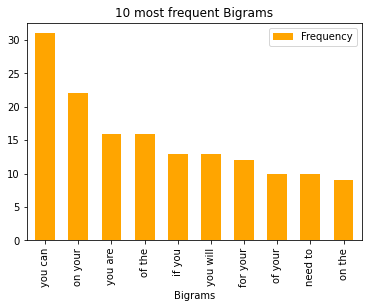

In [27]:
# 10 most frequent bigrams 
bigram_table_10.plot('Bigrams','Frequency',kind='bar', width=0.6, color ='orange', title ='10 most frequent Bigrams')

In [28]:
#trigrams = ngrams(corpus.split(), 3)
#for item in trigrams:
#    print(item)

#creating dicitionary of trigrams with their frequency
trigrams = ngrams(corpus.split(), 3)

trigram_dict = {}
for item in trigrams:
    #print(item)
    itemText = item[0]+' '+item[1]+' '+item[2]
    if itemText not in trigram_dict.keys():
        trigram_dict[itemText] = 1
    else:    
        trigram_dict[itemText] +=1 
    
trigram_dict

{'complete guide to': 2,
 'guide to building': 2,
 'to building an': 2,
 'building an e-commerce': 2,
 'an e-commerce business': 2,
 'e-commerce business content': 1,
 'business content and': 1,
 'content and social': 1,
 'and social media': 2,
 'social media marketingfor': 1,
 'media marketingfor small': 1,
 'marketingfor small businesses': 1,
 'small businesses in': 1,
 'businesses in technology': 1,
 'in technology and': 1,
 'technology and an': 1,
 'and an increasingly': 1,
 'an increasingly savvy': 1,
 'increasingly savvy consumer': 1,
 'savvy consumer market': 1,
 'consumer market has': 1,
 'market has made': 1,
 'has made e-commerce': 1,
 'made e-commerce a': 1,
 'e-commerce a powerful': 1,
 'a powerful force': 1,
 'powerful force in': 1,
 'force in the': 1,
 'in the global': 1,
 'the global economy.': 1,
 'global economy. with': 1,
 'economy. with more': 1,
 'with more people': 1,
 'more people opting': 1,
 'people opting to': 1,
 'opting to shop': 1,
 'to shop on': 1,
 'shop o

In [29]:
#converting dictionary to dataframe for sorting and plotting
list_trigram_key = list(trigram_dict.keys()) #converts dictionary keys to list of keys
list_trigram_val = list(trigram_dict.values()) # converts dictionary values to list of values

# creating table for noun words frequency
trigram_table = pd.DataFrame()
trigram_table['Trigrams']    = list_trigram_key
trigram_table['Frequency']  = list_trigram_val
trigram_table.sort_values(by='Frequency', ascending=False, inplace=True)
trigram_table_10            = trigram_table.head(10)
trigram_table_10

,Trigrams,Frequency
243,if you are,8
131,you need to,8
473,there are many,5
513,you will need,4
273,you can use,4
913,you are looking,4
405,you do not,4
1552,a merchant account.,4
812,to set up,3
998,here is a,3


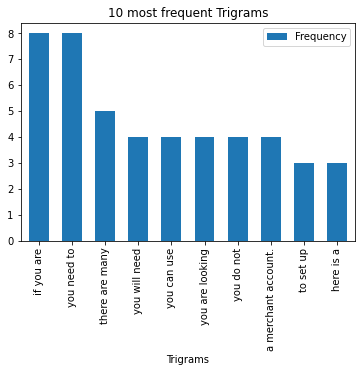

In [30]:
# 10 most frequent trigrams 
trigram_table_10.plot('Trigrams','Frequency', kind='bar', width=0.6, title ='10 most frequent Trigrams')

#### Using Wordcloud

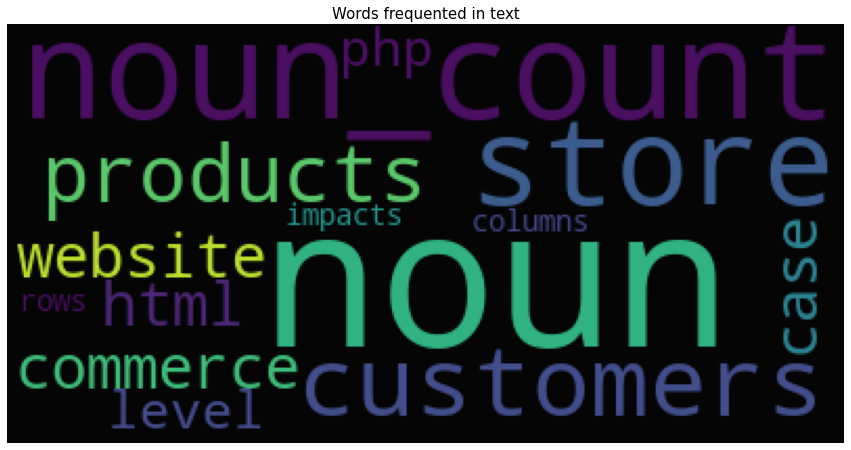

In [31]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                        background_color='black',
                        stopwords=stopwords,
                        max_words=200, 
                        random_state=42).generate(str(noun_table))

plt.figure(figsize=(15,10))
plt.axis("off")
plt.title("Words frequented in text", fontsize=15)
plt.imshow(wordcloud.recolor(colormap= 'viridis' , random_state=42), alpha=0.98)
plt.show()

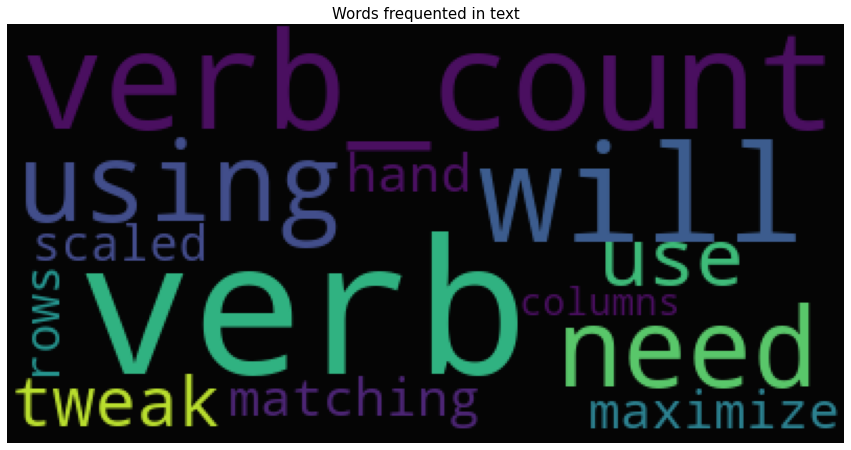

In [32]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                        background_color='black',
                        stopwords=stopwords,
                        max_words=200, 
                        random_state=42).generate(str(verb_table))

plt.figure(figsize=(15,10))
plt.axis("off")
plt.title("Words frequented in text", fontsize=15)
plt.imshow(wordcloud.recolor(colormap= 'viridis' , random_state=42), alpha=0.98)
plt.show()

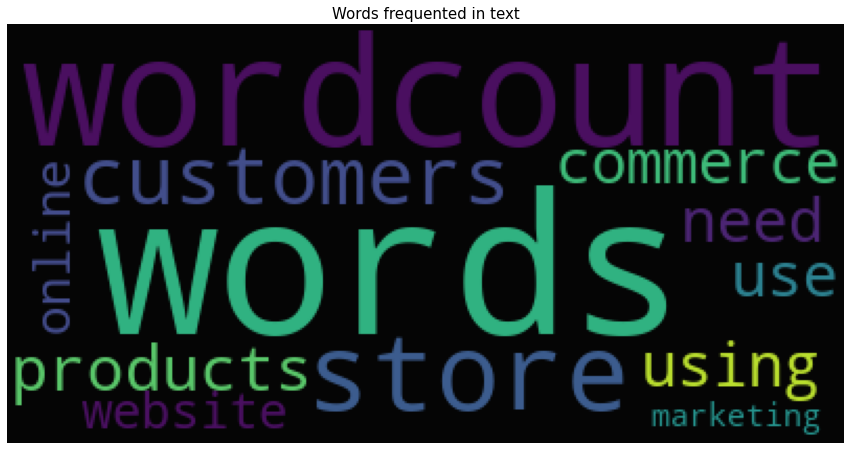

In [33]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                        background_color='black',
                        stopwords=stopwords,
                        max_words=200, 
                        random_state=42).generate(str(word_count_t))

plt.figure(figsize=(15,10))
plt.axis("off")
plt.title("Words frequented in text", fontsize=15)
plt.imshow(wordcloud.recolor(colormap= 'viridis' , random_state=42), alpha=0.98)
plt.show()

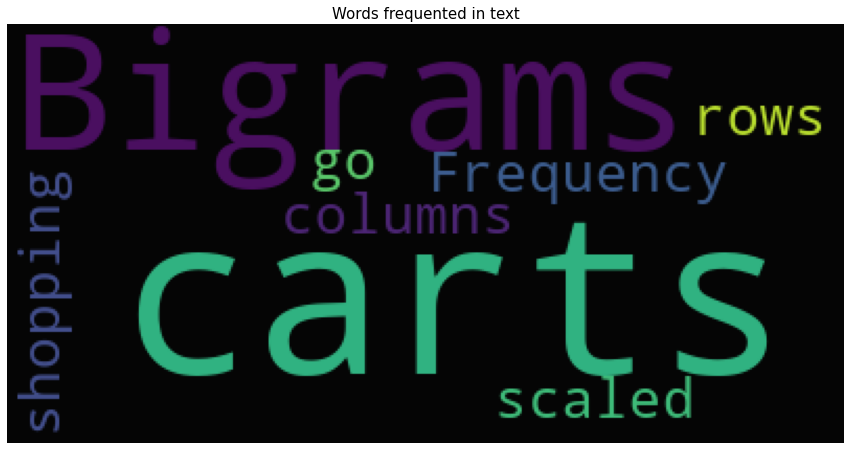

In [34]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                        background_color='black',
                        stopwords=stopwords,
                        max_words=200, 
                        random_state=42).generate(str(bigram_table))

plt.figure(figsize=(15,10))
plt.axis("off")
plt.title("Words frequented in text", fontsize=15)
plt.imshow(wordcloud.recolor(colormap= 'viridis' , random_state=42), alpha=0.98)
plt.show()

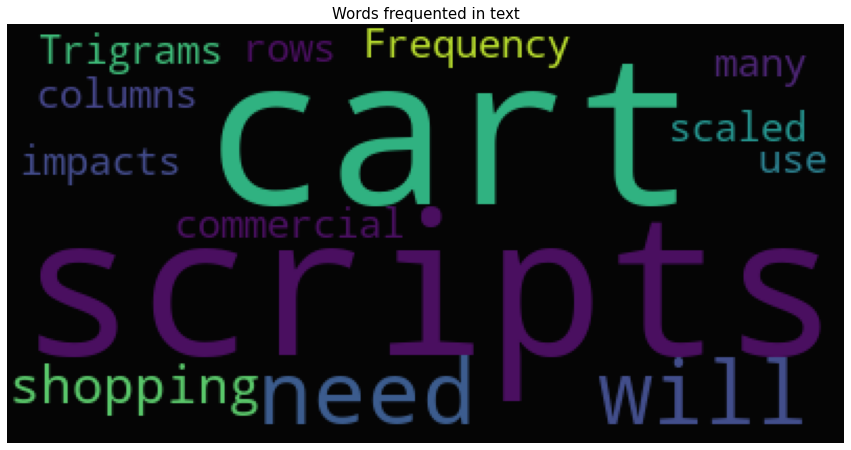

In [35]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                        background_color='black',
                        stopwords=stopwords,
                        max_words=200, 
                        random_state=42).generate(str(trigram_table))

plt.figure(figsize=(15,10))
plt.axis("off")
plt.title("Words frequented in text", fontsize=15)
plt.imshow(wordcloud.recolor(colormap= 'viridis' , random_state=42), alpha=0.98)
plt.show()

# Automatic Summarizers

###  Extractive

##### Using Sumy

In [36]:
language = "english"
sentence_count = 5
 
parser = PlaintextParser(corpus, Tokenizer(language))

In [37]:
summarizer = LexRankSummarizer(Stemmer(language))
summarizer.stop_words = get_stop_words(language)
#Summarize the document with 2 sentences
summary = summarizer(parser.document, sentence_count) 
    
summary_pre_LexRankSummarizer = ' '.join([str(sentence) for sentence in summary])
summary_pre_LexRankSummarizer

'if you are online, set up customers . you can easily add users, products, features and take payments online in just a few minutes.company gives you everything you need to set up an online store including a website, domain name, secure shopping cart, product catalog, payment gateway, email account and so on.the stores are built and optimized to rank well on google and are also mobile friendly. here is a breakdown of the features for each price package.if you do not want a hosted solution, you can make your own e-commerce scripts or use other open source or commercial shopping cart scripts. there are many tutorials that show how you can secure your wordpress site.credit cards provide customers with an easy way to make payments at your store. this is where the real work begins.generate leads to your e-commerce storemethods are search engine optimization , content marketing, social media marketing and paid advertisements.high on search engine results pages when customers type various keyw

In [38]:
from sumy.summarizers.luhn import LuhnSummarizer
summarizer_1 = LuhnSummarizer(Stemmer(language))
summarizer_1.stop_words = get_stop_words(language)
summary_1 = summarizer_1(parser.document, sentence_count)

summary_pre_LuhnSummarizer = ' '.join([str(sentence) for sentence in summary_1])
summary_pre_LuhnSummarizer

'the layout of y!ms is fairly straight-popular payment options on your y!ms store including credit cards, checks, money orders and paypal. you can easily add users, products, features and take payments online in just a few minutes.company gives you everything you need to set up an online store including a website, domain name, secure shopping cart, product catalog, payment gateway, email account and so on.the stores are built and optimized to rank well on google and are also mobile friendly. the tools include site management, marketing promotions, analytics and reporting, catalogue management, search engine optimization, product browsing, mobile commerce and others. set up the store to load fast and its content to be easily found by search engine robots .ensure your design will provide a good user experience to your customers. this is where the real work begins.generate leads to your e-commerce storemethods are search engine optimization , content marketing, social media marketing and 

In [39]:
from sumy.summarizers.lsa import LsaSummarizer
summarizer_2 = LsaSummarizer(Stemmer(language))
summarizer_2.stop_words = get_stop_words(language)
summary_2 = summarizer_2(parser.document, sentence_count)

summary_pre_LsaSummarizer = ' '.join([str(sentence) for sentence in summary_2])
summary_pre_LsaSummarizer

'the company™s built-in marketing that includes discounts and coupon codes, automatically generated customer lists, newsletters, and social media integration make sure you have an edge with your store from the beginning. other options you can check include stripe, braintree, chargebee, chargify, among others.after you have set up your domain name, hosting and shopping script, you are ready to start selling some maintenance and tweak your website design to match the needs of your customers. the strategy should guide towards achieving your overall goals of getting more sales, improving brand awareness and increasing your store™s ranking on search engines.below are some content marketing tactics you should focus.i) blogginghave a blog on your store. ebooks that show how your products work and how they will help customers can enhance your brand and make your store the go-to place for any information related to your industry.tip: your content marketing strategies should complement each othe

In [40]:
from sumy.summarizers.text_rank import TextRankSummarizer
summarizer_3 = TextRankSummarizer(Stemmer(language))
summarizer_3.stop_words = get_stop_words(language)
summary_3 = summarizer_3(parser.document, sentence_count)

summary_pre_TextRankSummarizer = ' '.join([str(sentence) for sentence in summary_3])
summary_pre_TextRankSummarizer

'with hosting companies like bluehost and hostgator, you can there are many guides online that can help you with choosing the right hosting company.you can build your online store through hosted solutions or self hosted solutionsthere are companies that host e-commerce scripts on their servers and provide everything that you will need on the backend of your site. you can easily add users, products, features and take payments online in just a few minutes.company gives you everything you need to set up an online store including a website, domain name, secure shopping cart, product catalog, payment gateway, email account and so on.the stores are built and optimized to rank well on google and are also mobile friendly. improve your sales.before we look at marketing your site, you need to get design right.your e-commerce store designwhether you are using a hosted or self-hosted e-commerce script, there are two major things about design you should consider:your store should be designed to clo

In [41]:
from sumy.summarizers.edmundson import EdmundsonSummarizer
summarizer_4 = EdmundsonSummarizer(Stemmer(language))
summarizer_4.stop_words = get_stop_words(language)
summarizer_4.bonus_words = corpus.split()
summarizer_4.stigma_words = ['zdfgthdvndadv']
summarizer_4.null_words = stop_words
summary_4 = summarizer_4(parser.document, sentence_count)

summary_pre_EdmundsonSummarizer = ' '.join([str(sentence) for sentence in summary_4])
summary_pre_EdmundsonSummarizer

'with hosting companies like bluehost and hostgator, you can there are many guides online that can help you with choosing the right hosting company.you can build your online store through hosted solutions or self hosted solutionsthere are companies that host e-commerce scripts on their servers and provide everything that you will need on the backend of your site. you can easily add users, products, features and take payments online in just a few minutes.company gives you everything you need to set up an online store including a website, domain name, secure shopping cart, product catalog, payment gateway, email account and so on.the stores are built and optimized to rank well on google and are also mobile friendly. improve your sales.before we look at marketing your site, you need to get design right.your e-commerce store designwhether you are using a hosted or self-hosted e-commerce script, there are two major things about design you should consider:your store should be designed to clo

In [42]:
from sumy.summarizers.reduction import ReductionSummarizer
summarizer_7 = ReductionSummarizer(Stemmer(language))
summarizer_7.stop_words = get_stop_words(language)
summary_7 = summarizer_7(parser.document, sentence_count)

summary_pre_ReductionSummarizer = ' '.join([str(sentence) for sentence in summary_7])
summary_pre_ReductionSummarizer

'with hosting companies like bluehost and hostgator, you can there are many guides online that can help you with choosing the right hosting company.you can build your online store through hosted solutions or self hosted solutionsthere are companies that host e-commerce scripts on their servers and provide everything that you will need on the backend of your site. you can easily add users, products, features and take payments online in just a few minutes.company gives you everything you need to set up an online store including a website, domain name, secure shopping cart, product catalog, payment gateway, email account and so on.the stores are built and optimized to rank well on google and are also mobile friendly. improve your sales.before we look at marketing your site, you need to get design right.your e-commerce store designwhether you are using a hosted or self-hosted e-commerce script, there are two major things about design you should consider:your store should be designed to clo

##### Using Gensim

In [43]:
summary_using_gensim = summarize(corpus, word_count=100)
print(summary_using_gensim)

with hosting companies like bluehost and hostgator, you can there are many guides online that can help you with choosing the right hosting company.you can build your online store through hosted solutions or self hosted solutionsthere are companies that host e-commerce scripts on their servers and provide everything that you will need on the backend of your site.
you can easily add users, products, features and take payments online in just a few minutes.company gives you everything you need to set up an online store including a website, domain name, secure shopping cart, product catalog, payment gateway, email account and so on.the stores are built and optimized to rank well on google and are also mobile friendly.


###   Abstractive

In [44]:
model_t5 = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')
device = torch.device('cpu')  # model was trained on GPU, need to do when running on CPU

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/231M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

In [45]:
preprocess_text = corpus.strip().replace("\n","")
t5_prepared_Text = "summarize: "+preprocess_text # need to add 'summarize:' to input text data
#print ("original text preprocessed: \n", preprocess_text)
print ("original text preprocessed: \n", len(preprocess_text))

original text preprocessed: 
 21309


In [46]:
tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt").to(device)

# summmarize 
summary_ids = model_t5.generate(tokenized_text,
                                    num_beams=4,
                                    no_repeat_ngram_size=2,
                                    min_length=100,
                                    max_length=400,
                                    early_stopping=True)

summary_pre_Transformer = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print ("\n\nSummarized text: \n",summary_pre_Transformer)

Token indices sequence length is longer than the specified maximum sequence length for this model (4492 > 512). Running this sequence through the model will result in indexing errors




Summarized text: 
 e-commerce is a powerful force in the global economy. if you are using wordpress, you need to be proactive in promoting your products and boosting your sales. there are many free and paid solutions that can help you build your business. you can use either open source or self-hosted solutions. the best thing about designing your store is to know what your customers want to sell. it is important to keep in mind your goals and how you see your company.


# Model Building - Extractive Summerizer

### Word frequency -  Spacy

In [47]:
nlp = spacy.load('en_core_web_sm')

In [48]:
print("length of corpus =",len(corpus))
#passing entire corpus(string)
doc = nlp(corpus)
print("length of doc =",len(doc))
doc

length of corpus = 21309
length of doc = 3945


complete guide to building an e-commerce business content and social media marketingfor small businesses in technology and an increasingly savvy consumer market has made e-commerce a powerful force in the global economy. with more people opting to shop on the internet, smbs take steps to reach this market by setting up online shops. as more payment services providers get into the market, setting up an e-commerce website is no longer cost-prohibitive. today, anyone with basic web skills can set up a robust e-commerce site within a few days and without breaking the bank.one of the major things that buyers are concerned about when shopping online is their security. with major online fraud cases being reported around the world, you cannot blame consumers for being extra cautious. therefore, when setting up an e-commerce store, you need to plan carefully and keep security at the forefront of your installation.with that said, this guide will take you from marketing. let™s get started.the pla

In [49]:
#print tokens from the doc
word_tokens = [tokens.text for tokens in doc]
print("length of tokens", len(word_tokens))
print(word_tokens)

length of tokens 3945
['complete', 'guide', 'to', 'building', 'an', 'e', '-', 'commerce', 'business', 'content', 'and', 'social', 'media', 'marketingfor', 'small', 'businesses', 'in', 'technology', 'and', 'an', 'increasingly', 'savvy', 'consumer', 'market', 'has', 'made', 'e', '-', 'commerce', 'a', 'powerful', 'force', 'in', 'the', 'global', 'economy', '.', 'with', 'more', 'people', 'opting', 'to', 'shop', 'on', 'the', 'internet', ',', 'smbs', 'take', 'steps', 'to', 'reach', 'this', 'market', 'by', 'setting', 'up', 'online', 'shops', '.', 'as', 'more', 'payment', 'services', 'providers', 'get', 'into', 'the', 'market', ',', 'setting', 'up', 'an', 'e', '-', 'commerce', 'website', 'is', 'no', 'longer', 'cost', '-', 'prohibitive', '.', 'today', ',', 'anyone', 'with', 'basic', 'web', 'skills', 'can', 'set', 'up', 'a', 'robust', 'e', '-', 'commerce', 'site', 'within', 'a', 'few', 'days', 'and', 'without', 'breaking', 'the', 'bank.one', 'of', 'the', 'major', 'things', 'that', 'buyers', 'are'

In [50]:
spacy_stopwords = list(STOP_WORDS)
print(spacy_stopwords)

['others', 'be', "'s", 'twelve', 'latter', 'please', 'except', 'seems', 'across', '‘ve', 'has', 'being', 'should', 'so', 'latterly', 'other', 'each', 'what', '‘m', 'amongst', 'a', 'among', 'between', 'own', 'then', 'whoever', 'both', 'out', 'see', 'whose', 'can', 'whatever', 'before', 'therein', 'third', 'by', 'least', 'were', 'us', 'something', 'everyone', 'nobody', 'enough', 'once', '’m', 'indeed', 'formerly', 'anywhere', 'if', 'not', 'them', 'could', 'ever', 'noone', 'hereupon', "'ll", 'part', 'above', 'fifty', 'call', 'which', 'anyone', 'into', 'go', 'becomes', 'hereby', 'become', 'herself', 'yourself', 'empty', 'are', 'whereby', 'toward', 'still', 'take', 'all', 'whereas', '‘s', 'such', 'the', 'everywhere', 'about', 'nevertheless', 'twenty', 're', 'former', 'n’t', '’re', 'ca', 'there', 'also', 'put', 'whole', 'otherwise', '‘ll', 'anything', 'regarding', '‘re', 'thereupon', 'rather', 'herein', 'became', "'re", 'well', 'every', "'ve", 'yourselves', 'some', 'he', 'along', 'for', 'hen

In [51]:
#removing punctuation and stopwords
#creates word frequency dictionary with words(keys) thier frequency(values)
word_frequencies = {} 
for word in word_tokens:
    if word not in punctuation:
        if word not in spacy_stopwords:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] +=1

print(word_frequencies)

{'complete': 5, 'guide': 5, 'building': 11, 'e': 20, 'commerce': 21, 'business': 13, 'content': 11, 'social': 8, 'media': 8, 'marketingfor': 1, 'small': 3, 'businesses': 1, 'technology': 1, 'increasingly': 1, 'savvy': 1, 'consumer': 1, 'market': 6, 'powerful': 1, 'force': 2, 'global': 1, 'economy': 1, 'people': 1, 'opting': 1, 'shop': 4, 'internet': 1, 'smbs': 2, 'steps': 1, 'reach': 2, 'setting': 5, 'online': 17, 'shops': 1, 'payment': 7, 'services': 3, 'providers': 2, 'website': 19, 'longer': 1, 'cost': 2, 'prohibitive': 1, 'today': 1, 'basic': 2, 'web': 3, 'skills': 1, 'set': 8, 'robust': 1, 'site': 14, 'days': 1, 'breaking': 1, 'bank.one': 1, 'major': 5, 'things': 4, 'buyers': 2, 'concerned': 2, 'shopping': 5, 'security': 4, 'fraud': 1, 'cases': 1, 'reported': 1, 'world': 1, 'blame': 1, 'consumers': 1, 'extra': 1, 'cautious': 1, 'store': 40, 'need': 19, 'plan': 1, 'carefully': 3, 'forefront': 1, 'installation.with': 1, 'said': 1, 'marketing': 17, 'let': 1, '™': 13, 's': 9, 'started

In [52]:
max_frequency = max(word_frequencies.values())
max_frequency

40

In [53]:
#we will divide each value in word_frequency dict by maximum frequency(40)
#to get a normalized value for all words
#so, 40/40 = 1, is the maximum normalized frequency

for word in word_frequencies.keys():
    word_frequencies[word] = word_frequencies[word]/max_frequency
    
print(word_frequencies)

{'complete': 0.125, 'guide': 0.125, 'building': 0.275, 'e': 0.5, 'commerce': 0.525, 'business': 0.325, 'content': 0.275, 'social': 0.2, 'media': 0.2, 'marketingfor': 0.025, 'small': 0.075, 'businesses': 0.025, 'technology': 0.025, 'increasingly': 0.025, 'savvy': 0.025, 'consumer': 0.025, 'market': 0.15, 'powerful': 0.025, 'force': 0.05, 'global': 0.025, 'economy': 0.025, 'people': 0.025, 'opting': 0.025, 'shop': 0.1, 'internet': 0.025, 'smbs': 0.05, 'steps': 0.025, 'reach': 0.05, 'setting': 0.125, 'online': 0.425, 'shops': 0.025, 'payment': 0.175, 'services': 0.075, 'providers': 0.05, 'website': 0.475, 'longer': 0.025, 'cost': 0.05, 'prohibitive': 0.025, 'today': 0.025, 'basic': 0.05, 'web': 0.075, 'skills': 0.025, 'set': 0.2, 'robust': 0.025, 'site': 0.35, 'days': 0.025, 'breaking': 0.025, 'bank.one': 0.025, 'major': 0.125, 'things': 0.1, 'buyers': 0.05, 'concerned': 0.05, 'shopping': 0.125, 'security': 0.1, 'fraud': 0.025, 'cases': 0.025, 'reported': 0.025, 'world': 0.025, 'blame': 0

In [54]:
sentence_tokens = [sent for sent in doc.sents]
print("length of sentence tokens =",len(sentence_tokens),"\n")
print(sentence_tokens)

length of sentence tokens = 202 

[complete guide to building an e-commerce business content and social media, marketingfor small businesses in technology and an increasingly savvy consumer market has made e-commerce a powerful force in the global economy., with more people opting to shop on the internet, smbs take steps to reach this market by setting up online shops., as more payment services providers get into the market, setting up an e-commerce website is no longer cost-prohibitive., today, anyone with basic web skills can set up a robust e-commerce site within a few days and without breaking the bank.one of the major things that buyers are concerned about when shopping online is their security., with major online fraud cases being reported around the world, you cannot blame consumers for being extra cautious., therefore, when setting up an e-commerce store, you need to plan carefully and keep security at the forefront of your installation.with that said, this guide will take you 

In [55]:
#to calculate sentence scores
#print(word_frequencies)
sentence_scores = {}

for sent in sentence_tokens:
        for word in sent: # for each word in sentence
            if word.text.lower() in word_frequencies.keys(): # if word exists in word frequency dict
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word.text.lower()]#freq. of word from word_freq dict assig to sent_score dict
                else:
                    sentence_scores[sent] += word_frequencies[word.text.lower()]

In [56]:
sentence_scores

{complete guide to building an e-commerce business content and social media: 2.5500000000000003,
 marketingfor small businesses in technology and an increasingly savvy consumer market has made e-commerce a powerful force in the global economy.: 1.5249999999999997,
 with more people opting to shop on the internet, smbs take steps to reach this market by setting up online shops.: 1.025,
 as more payment services providers get into the market, setting up an e-commerce website is no longer cost-prohibitive.: 2.175,
 today, anyone with basic web skills can set up a robust e-commerce site within a few days and without breaking the bank.one of the major things that buyers are concerned about when shopping online is their security.: 2.8249999999999993,
 with major online fraud cases being reported around the world, you cannot blame consumers for being extra cautious.: 0.7500000000000002,
 therefore, when setting up an e-commerce store, you need to plan carefully and keep security at the forefr

In [57]:
#30% of the sentences from the entire corpus will be selected
# ie 30% of 173 sentences = 51 sentence
select_length = int(len(sentence_tokens)*0.03)
select_length

6

In [58]:
#will select sentences(select_length=5) with highest sentence score
summary = nlargest(select_length,sentence_scores,key=sentence_scores.get)
summary

[you can easily add users, products, features and take payments online in just a few minutes.company gives you everything you need to set up an online store including a website, domain name, secure shopping cart, product catalog, payment gateway, email account,
 that can help you with choosing the right hosting company.you can build your online store through hosted solutions or self hosted solutionsthere are companies that host e-commerce scripts on their servers and provide everything that you will need on the backend of your site.,
 this is where the real work begins.generate leads to your e-commerce storemethods are search engine optimization , content marketing, social media marketing and paid advertisements.high on search engine results pages when customers type various keywords related to your products.,
 having a consistent brand is crucial for a good user experience on your shop.tip: when choosing a hosted checkout solution, keep in mind your customers™ user experience and secu

In [59]:
#converting summary to string
summary_spacy_wordfrequency = ' '.join([str(elem) for elem in summary])
print("Summary :\n",summary_spacy_wordfrequency)

Summary :
 you can easily add users, products, features and take payments online in just a few minutes.company gives you everything you need to set up an online store including a website, domain name, secure shopping cart, product catalog, payment gateway, email account that can help you with choosing the right hosting company.you can build your online store through hosted solutions or self hosted solutionsthere are companies that host e-commerce scripts on their servers and provide everything that you will need on the backend of your site. this is where the real work begins.generate leads to your e-commerce storemethods are search engine optimization , content marketing, social media marketing and paid advertisements.high on search engine results pages when customers type various keywords related to your products. having a consistent brand is crucial for a good user experience on your shop.tip: when choosing a hosted checkout solution, keep in mind your customers™ user experience and 

#### Sentiment Analysis Function

In [60]:
#sentiment analysis
def summarysentiment(textsummary):
    list_assert_words = []
    afn = Afinn()
    scores = afn.score(textsummary)
    listAssertWords = afn.find_all(textsummary)
    #converting list to string
    strAssertWords = ', '
    strAssertWords = strAssertWords.join(listAssertWords)
    
    sentiment = ''
    if scores > 0:
        sentiment = 'Positive'
    elif scores < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    
    return (sentiment,strAssertWords,scores)

#### Sentiment Analysis

In [61]:
#sentiment analysis
sentiment_summary, strAssertWords,scores = summarysentiment(summary_spacy_wordfrequency)

sumarry_sentiments                   = pd.DataFrame()
sumarry_sentiments['Summary']        = pd.DataFrame([[summary_spacy_wordfrequency]])
sumarry_sentiments['Assert words']   = strAssertWords
sumarry_sentiments['Score']          = pd.DataFrame([[scores]])
sumarry_sentiments['Review']         = pd.DataFrame([[sentiment_summary]])

sumarry_sentiments

,Summary,Assert words,Score,Review
0,"you can easily add users, products, features a...","secure, help, solutions, good, solution, solut...",23.0,Positive


###  TF-IDF  - NLTK

In [62]:
#sentence tokenization from text 
sentences  = sent_tokenize(corpus)
print(sentences)
total_documents = len(sentences)
total_documents

['complete guide to building an e-commerce business content and social media marketingfor small businesses in technology and an increasingly savvy consumer market has made e-commerce a powerful force in the global economy.', 'with more people opting to shop on the internet, smbs take steps to reach this market by setting up online shops.', 'as more payment services providers get into the market, setting up an e-commerce website is no longer cost-prohibitive.', 'today, anyone with basic web skills can set up a robust e-commerce site within a few days and without breaking the bank.one of the major things that buyers are concerned about when shopping online is their security.', 'with major online fraud cases being reported around the world, you cannot blame consumers for being extra cautious.', 'therefore, when setting up an e-commerce store, you need to plan carefully and keep security at the forefront of your installation.with that said, this guide will take you from marketing.', 'let™s

169

In [63]:
#calculate frequency of words in each sentence
from nltk.corpus import stopwords
def create_frequency_matrix(sentences):
    frequency_matrix = {}
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    
    for sent in sentences:
        #print(sent,"\n")
        freq_table = {}
        words = word_tokenize(sent)
        #print(words,"\n")
        for word in words:
            word = word.lower()
            word = ps.stem(word)
            if word in stop_words:
                continue
            
            #print(word)
            if word in freq_table:
                freq_table[word] += 1
            else:
                freq_table[word] = 1
                
        frequency_matrix[sent[:15]] = freq_table
        
    return frequency_matrix

#Create the Frequency matrix of the words in each sentence.
freq_matrix = create_frequency_matrix(sentences)
print(freq_matrix)

{'complete guide ': {'complet': 1, 'guid': 1, 'build': 1, 'e-commerc': 1, 'busi': 2, 'also': 1, 'creat': 1, 'googl': 3, 'account': 1, 'compani': 1, 'access': 1, 'app': 1, 'analyt': 1, 'doc': 1, 'use': 1, '.': 1}, 'with more peopl': {'peopl': 1, 'opt': 1, 'shop': 2, 'internet': 1, ',': 1, 'smb': 1, 'take': 1, 'step': 1, 'reach': 1, 'thi': 1, 'market': 1, 'set': 1, 'onlin': 1, '.': 1}, 'as more payment': {'payment': 1, 'servic': 1, 'provid': 1, 'get': 1, 'market': 1, ',': 1, 'set': 1, 'e-commerc': 1, 'websit': 1, 'longer': 1, 'cost-prohibit': 1, '.': 1}, 'today, anyone w': {'today': 1, ',': 1, 'anyon': 1, 'basic': 1, 'web': 1, 'skill': 1, 'set': 1, 'robust': 1, 'e-commerc': 1, 'site': 1, 'within': 1, 'day': 1, 'without': 1, 'break': 1, 'bank.on': 1, 'major': 1, 'thing': 1, 'buyer': 1, 'concern': 1, 'shop': 1, 'onlin': 1, 'secur': 1, '.': 1}, 'with major onli': {'major': 1, 'onlin': 1, 'fraud': 1, 'case': 1, 'report': 1, 'around': 1, 'world': 1, ',': 1, 'blame': 1, 'consum': 1, 'extra': 1

In [64]:
#calculating term frequency
#Here, the document is a sentence, the term is a word in sentence
def create_tf_matrix(freq_matrix):
    tf_matrix = {}
    
    for sent,f_table in freq_matrix.items():
        #print(f_table)
        tf_table = {}
        count_words_sentence = len(f_table)
        #print(count_words_sentence)
        for word, count in f_table.items():
            tf_table[word] = count/count_words_sentence

        tf_matrix[sent] = tf_table
            
    return tf_matrix 

#calculate the term frequency and generate a matrix
tf_matrix = create_tf_matrix(freq_matrix)
print(tf_matrix)

{'complete guide ': {'complet': 0.0625, 'guid': 0.0625, 'build': 0.0625, 'e-commerc': 0.0625, 'busi': 0.125, 'also': 0.0625, 'creat': 0.0625, 'googl': 0.1875, 'account': 0.0625, 'compani': 0.0625, 'access': 0.0625, 'app': 0.0625, 'analyt': 0.0625, 'doc': 0.0625, 'use': 0.0625, '.': 0.0625}, 'with more peopl': {'peopl': 0.07142857142857142, 'opt': 0.07142857142857142, 'shop': 0.14285714285714285, 'internet': 0.07142857142857142, ',': 0.07142857142857142, 'smb': 0.07142857142857142, 'take': 0.07142857142857142, 'step': 0.07142857142857142, 'reach': 0.07142857142857142, 'thi': 0.07142857142857142, 'market': 0.07142857142857142, 'set': 0.07142857142857142, 'onlin': 0.07142857142857142, '.': 0.07142857142857142}, 'as more payment': {'payment': 0.08333333333333333, 'servic': 0.08333333333333333, 'provid': 0.08333333333333333, 'get': 0.08333333333333333, 'market': 0.08333333333333333, ',': 0.08333333333333333, 'set': 0.08333333333333333, 'e-commerc': 0.08333333333333333, 'websit': 0.083333333

In [65]:
#calculating how many sentences contains a word
def create_documents_per_words(freq_matrix):
    word_per_doc_table = {}
    
    for sent, f_table in freq_matrix.items():
        #print(sent)
        #print(f_table)
        for word, count in f_table.items():
            if word in word_per_doc_table:
                #print(word)
                word_per_doc_table[word] +=1
            else:
                word_per_doc_table[word] = 1
                
    return word_per_doc_table

#creating table for documents per words
count_doc_per_words  = create_documents_per_words(freq_matrix)
print(count_doc_per_words)

{'complet': 3, 'guid': 5, 'build': 10, 'e-commerc': 16, 'busi': 11, 'also': 12, 'creat': 4, 'googl': 4, 'account': 12, 'compani': 9, 'access': 1, 'app': 2, 'analyt': 2, 'doc': 1, 'use': 35, '.': 160, 'peopl': 1, 'opt': 1, 'shop': 7, 'internet': 1, ',': 82, 'smb': 2, 'take': 4, 'step': 1, 'reach': 2, 'thi': 14, 'market': 20, 'set': 11, 'onlin': 14, 'payment': 9, 'servic': 3, 'provid': 14, 'get': 10, 'websit': 18, 'longer': 1, 'cost-prohibit': 1, 'today': 1, 'anyon': 2, 'basic': 2, 'web': 3, 'skill': 1, 'robust': 1, 'site': 13, 'within': 2, 'day': 1, 'without': 2, 'break': 1, 'bank.on': 1, 'major': 5, 'thing': 5, 'buyer': 2, 'concern': 2, 'secur': 7, 'fraud': 1, 'case': 2, 'report': 2, 'around': 1, 'world': 1, 'blame': 1, 'consum': 2, 'extra': 1, 'cautiou': 1, 'therefor': 1, 'store': 33, 'need': 20, 'plan': 3, 'care': 3, 'keep': 2, 'forefront': 1, 'installation.with': 1, 'said': 1, 'let™': 1, 'started.th': 1, 'stagebefor': 1, 'jump': 1, 'must': 1, 'know': 7, 'sell': 4, 'least': 1, 'answe

In [66]:
#calculating IDF for each word in a sentence
def create_idf_matrix(freq_matrix, count_doc_per_words, total_documents):
    idf_matrix = {}
    
    for sent, f_table in freq_matrix.items():
        idf_table = {}
        #print(sent)

        for word in f_table.keys():
            idf_table[word] = math.log10(total_documents / float(count_doc_per_words[word]))

        idf_matrix[sent] = idf_table

    return idf_matrix

# calculate IDF and generate a matrix
idf_matrix = create_idf_matrix(freq_matrix, count_doc_per_words, total_documents)
print(idf_matrix)

{'complete guide ': {'complet': 1.750765449894011, 'guid': 1.5289167002776547, 'build': 1.2278867046136734, 'e-commerc': 1.0237667219577486, 'busi': 1.1864940194554485, 'also': 1.1487054585660488, 'creat': 1.6258267132857112, 'googl': 1.6258267132857112, 'account': 1.1487054585660488, 'compani': 1.2736441951743487, 'access': 2.2278867046136734, 'app': 1.9268567089496924, 'analyt': 1.9268567089496924, 'doc': 2.2278867046136734, 'use': 0.6838186602633979, '.': 0.02376672195774872}, 'with more peopl': {'peopl': 2.2278867046136734, 'opt': 2.2278867046136734, 'shop': 1.3827886645994167, 'internet': 2.2278867046136734, ',': 0.31407285222995684, 'smb': 1.9268567089496924, 'take': 1.6258267132857112, 'step': 2.2278867046136734, 'reach': 1.9268567089496924, 'thi': 1.0817586689354355, 'market': 0.9268567089496923, 'set': 1.1864940194554485, 'onlin': 1.0817586689354355, '.': 0.02376672195774872}, 'as more payment': {'payment': 1.2736441951743487, 'servic': 1.750765449894011, 'provid': 1.081758668

In [67]:
#calculating TF-IDF (i.e TF*IDF)
def create_tf_idf_matrix(tf_matrix, idf_matrix):
    tf_idf_matrix = {}
    for (sent1, f_table1), (sent2, f_table2) in zip(tf_matrix.items(), idf_matrix.items()):

        tf_idf_table = {}

        for (word1, value1), (word2, value2) in zip(f_table1.items(),f_table2.items()):  # here, keys are the same in both the table
            tf_idf_table[word1] = float(value1 * value2)

        tf_idf_matrix[sent1] = tf_idf_table

    return tf_idf_matrix

# Calculate TF-IDF and generate a matrix
tf_idf_matrix = create_tf_idf_matrix(tf_matrix, idf_matrix)
print(tf_idf_matrix)

{'complete guide ': {'complet': 0.10942284061837569, 'guid': 0.09555729376735342, 'build': 0.07674291903835459, 'e-commerc': 0.06398542012235929, 'busi': 0.14831175243193107, 'also': 0.07179409116037805, 'creat': 0.10161416958035695, 'googl': 0.30484250874107083, 'account': 0.07179409116037805, 'compani': 0.07960276219839679, 'access': 0.1392429190383546, 'app': 0.12042854430935578, 'analyt': 0.12042854430935578, 'doc': 0.1392429190383546, 'use': 0.04273866626646237, '.': 0.001485420122359295}, 'with more peopl': {'peopl': 0.15913476461526238, 'opt': 0.15913476461526238, 'shop': 0.19754123779991667, 'internet': 0.15913476461526238, ',': 0.022433775159282632, 'smb': 0.13763262206783516, 'take': 0.11613047952040793, 'step': 0.15913476461526238, 'reach': 0.13763262206783516, 'thi': 0.0772684763525311, 'market': 0.06620405063926373, 'set': 0.08474957281824631, 'onlin': 0.0772684763525311, '.': 0.0016976229969820514}, 'as more payment': {'payment': 0.10613701626452905, 'servic': 0.145897120

In [68]:
#scoring sentences
def score_sentences(tf_idf_matrix) -> dict:
    sentenceValue = {}

    for sent, f_table in tf_idf_matrix.items():
        total_score_per_sentence = 0

        count_words_in_sentence = len(f_table)
        for word, score in f_table.items():
            total_score_per_sentence += score

        sentenceValue[sent] = total_score_per_sentence / count_words_in_sentence

    return sentenceValue

#score the sentences
sentence_scores = score_sentences(tf_idf_matrix)
print(sentence_scores)

{'complete guide ': 0.10545217886894982, 'with more peopl': 0.11107842815970582, 'as more payment': 0.09887083091601234, 'today, anyone w': 0.07040914744399154, 'with major onli': 0.1307479603427924, 'therefore, when': 0.0793165351141562, 'let™s get start': 0.11480355088164704, 'at the least, a': 0.10777824910863322, 'you need to car': 0.18216937612232356, 'it also helps t': 0.14445996699324867, 'to begin, buy a': 0.07684540410453422, 'if you are onli': 0.13210000200600033, 'having a youtub': 0.12552772591493416, 'the major work ': 0.11989421592096959, 'this have a pre': 0.07632370359017193, 'you can use nam': 0.13914434630301295, 'your domain nam': 0.2540392926417965, 'think carefully': 0.24524295816319955, 'look for a host': 0.10828757810869671, 'if you do not h': 0.1681201752615301, 'the language is': 0.2167695841543602, 'make sure your ': 0.11713307566300511, 'to begin, you w': 0.16160433323622772, 'with hosting co': 0.06099031097957734, 'this is referre': 0.20227166979644945, 'wit

In [69]:
#calculating threshold = average sentece score
def find_average_score(sentenceValue) -> int:
    
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original summary_text
    average = (sumValues / len(sentenceValue))

    return average

#Find the threshold
threshold = find_average_score(sentence_scores)
print(threshold)

0.13688255919312287


In [70]:
#select a sentence if the sentence score is greater than threshold
def generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        #print(sentence)
       # print(sentenceValue)
        #print(threshold)
        if sentence[:15] in sentenceValue and sentenceValue[sentence[:15]] >= (threshold):
        #if sentenceValue[sentence[:15]] >= (threshold):
            #print("inside if")
            #print(sentenceValue[sentence[:15]])
            #print(sentenceValue[sentence],"\n")
            summary += " " + sentence
            sentence_count += 1

    #print("==============",summary)
    return summary

In [71]:
#Generate the summary
summary_nltk_tfidf = generate_summary(sentences, sentence_scores, 1.5 * threshold)
print("summary:\n",summary_nltk_tfidf)

summary:
  your domain name will be part of your brand. think carefully about the name you want to use.company. the language is open source and is supported in most server environments. this is what constitutes a self-hosted solution. the installation process is simple even if you are not a programmer at heart. into the admin backend and select the design you want. you can try it depending on the features and functionalities you are looking for. compare the pricing structure here. the script is free to download. zen cart is best for those with some programming knowledge. the cart can be integrated with other modules to improve its functionality. the script is written in php and is frequently updated. to begin, the lack of operational history will disqualify you. one of the most popular payment gateways in the u.s. is authorize.net. these alternatives are good for smbs that cannot qualify for merchant accounts. the leader in this pack is paypal. what happens when goods sold are returned

#### Sentiment Analysis

In [72]:
#sentiment analysis
sentiment_summary_1, strAssertWords_1,scores_1 = summarysentiment(summary_nltk_tfidf)

sumarry_sentiments_1                   = pd.DataFrame()
sumarry_sentiments_1['Summary']        = pd.DataFrame([[summary_nltk_tfidf]])
sumarry_sentiments_1['Assert words']   = strAssertWords_1
sumarry_sentiments_1['Score']          = pd.DataFrame([[scores_1]])
sumarry_sentiments_1['Review']         = pd.DataFrame([[sentiment_summary_1]])

sumarry_sentiments_1

,Summary,Assert words,Score,Review
0,your domain name will be part of your brand. ...,"carefully, want, supported, solution, want, fr...",22.0,Positive


### BOW - CountVectorizer - Sklearn

In [73]:
print(len(corpus))

21309


In [74]:
sentences_bow  = sent_tokenize(corpus)
print(sentences_bow[:5])

['complete guide to building an e-commerce business content and social media marketingfor small businesses in technology and an increasingly savvy consumer market has made e-commerce a powerful force in the global economy.', 'with more people opting to shop on the internet, smbs take steps to reach this market by setting up online shops.', 'as more payment services providers get into the market, setting up an e-commerce website is no longer cost-prohibitive.', 'today, anyone with basic web skills can set up a robust e-commerce site within a few days and without breaking the bank.one of the major things that buyers are concerned about when shopping online is their security.', 'with major online fraud cases being reported around the world, you cannot blame consumers for being extra cautious.']


In [75]:
# Use TextBlob
def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

In [76]:
#removes stopwords, stems the words and gives vector representation of the words of each sentence
vec_count = CountVectorizer(analyzer='word', stop_words='english', tokenizer=textblob_tokenizer)
bow = vec_count.fit_transform(sentences_bow)
bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [77]:
df_bow = pd.DataFrame(bow.toarray(), columns= vec_count.get_feature_names())
df_bow

,10,301,abl,accept,access,account,achiev,action,actual,ad,add,add-onsus,admin,administr,advertis,advertisements.high,advertising.paid,agency.apart,aim,allow,alreadi,alt,altern,alway,analyt,angl,ani,announc,anoth,answer,anyon,apart,app,appeal,ask,audio,authorize.net,auto-complet,autom,automat,...,valu,variou,veri,vibrant,video,view,visibl,visitor,wa,wall,walmart,want,warehous,warm,way,web,websit,website.custom,website.th,website™,well-vers,white,win,wish,woocommerc,wordpress,work,world,worth,wp,write,written,y,yahoo,youtub,zen,ﬁhigh-risk.ﬂ,ﬁpower,ﬁsalesyﬂ,ﬁthank-youﬂ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
#adding sentences in dataframe
df_bow['sentence'] = sentences_bow
df_bow.head(5)

,10,301,abl,accept,access,account,achiev,action,actual,ad,add,add-onsus,admin,administr,advertis,advertisements.high,advertising.paid,agency.apart,aim,allow,alreadi,alt,altern,alway,analyt,angl,ani,announc,anoth,answer,anyon,apart,app,appeal,ask,audio,authorize.net,auto-complet,autom,automat,...,variou,veri,vibrant,video,view,visibl,visitor,wa,wall,walmart,want,warehous,warm,way,web,websit,website.custom,website.th,website™,well-vers,white,win,wish,woocommerc,wordpress,work,world,worth,wp,write,written,y,yahoo,youtub,zen,ﬁhigh-risk.ﬂ,ﬁpower,ﬁsalesyﬂ,ﬁthank-youﬂ,sentence
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,complete guide to building an e-commerce busin...
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,with more people opting to shop on the interne...
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,as more payment services providers get into th...
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"today, anyone with basic web skills can set up..."
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,with major online fraud cases being reported a...


In [79]:
df_bow['sentence score'] = df_bow.sum(axis=1)
df_bow['sentence score']

0      22
1      12
2       9
3      19
4      10
       ..
164    20
165    10
166     5
167    17
168    16
Name: sentence score, Length: 169, dtype: int64

In [80]:
#sorting on the basis of sentence score
df_bow.sort_values(by='sentence score', ascending=False, inplace=True)
df_bow[['sentence','sentence score']]

,sentence,sentence score
158,post high quality photos of your products and ...,35
55,"you can easily add users, products, features a...",34
24,with hosting companies like bluehost and hostg...,31
123,this is where the real work begins.generate le...,27
127,301 redirects improve customer experience on y...,26
...,...,...
129,and other irrelevant links on your site.,3
11,"if you are online, set up customers .",3
65,the script is free to download.,3
47,compare the pricing structure here.,3


In [81]:
summary_length  = 5
df_bow_topscore = df_bow[['sentence','sentence score']].head(summary_length)
print(df_bow_topscore.shape)
df_bow_topscore

(5, 2)


,sentence,sentence score
158,post high quality photos of your products and ...,35
55,"you can easily add users, products, features a...",34
24,with hosting companies like bluehost and hostg...,31
123,this is where the real work begins.generate le...,27
127,301 redirects improve customer experience on y...,26


In [82]:
df_bow_topscore = df_bow_topscore.reset_index(drop=True)
print(len(df_bow_topscore))
df_bow_topscore

5


,sentence,sentence score
0,post high quality photos of your products and ...,35
1,"you can easily add users, products, features a...",34
2,with hosting companies like bluehost and hostg...,31
3,this is where the real work begins.generate le...,27
4,301 redirects improve customer experience on y...,26


In [83]:
summary_bow = ''
for i in range(len(df_bow_topscore)):
    summary_bow += df_bow_topscore['sentence'][i]
    
summary_bow

'post high quality photos of your products and link to the products on your store.if you have specials on your store, announce to your fans on use twitter to engage your customers and prospects by users who are talking about your brand or products by searching various keywords on the network using hash tags.to automate your social media tasks such as posting on facebook and twitter.you can easily add users, products, features and take payments online in just a few minutes.company gives you everything you need to set up an online store including a website, domain name, secure shopping cart, product catalog, payment gateway, email account and so on.the stores are built and optimized to rank well on google and are also mobile friendly.with hosting companies like bluehost and hostgator, you can there are many guides online that can help you with choosing the right hosting company.you can build your online store through hosted solutions or self hosted solutionsthere are companies that host 

#### Sentiment Analysis

In [84]:
#sentiment analysis
sentiment_summary_1, strAssertWords_1,scores_1 = summarysentiment(summary_bow)

sumarry_sentiments_1                   = pd.DataFrame()
sumarry_sentiments_1['Summary']        = pd.DataFrame([[summary_bow]])
sumarry_sentiments_1['Assert words']   = strAssertWords_1
sumarry_sentiments_1['Score']          = pd.DataFrame([[scores_1]])
sumarry_sentiments_1['Review']         = pd.DataFrame([[sentiment_summary_1]])

sumarry_sentiments_1

,Summary,Assert words,Score,Review
0,post high quality photos of your products and ...,"quality, engage, prospects, secure, friendly, ...",16.0,Positive


### TfidfVectorizer - Sklearn

In [85]:
print(len(corpus))

21309


In [86]:
sentences  = sent_tokenize(corpus)
print(sentences)
total_documents = len(sentences)
total_documents

['complete guide to building an e-commerce business content and social media marketingfor small businesses in technology and an increasingly savvy consumer market has made e-commerce a powerful force in the global economy.', 'with more people opting to shop on the internet, smbs take steps to reach this market by setting up online shops.', 'as more payment services providers get into the market, setting up an e-commerce website is no longer cost-prohibitive.', 'today, anyone with basic web skills can set up a robust e-commerce site within a few days and without breaking the bank.one of the major things that buyers are concerned about when shopping online is their security.', 'with major online fraud cases being reported around the world, you cannot blame consumers for being extra cautious.', 'therefore, when setting up an e-commerce store, you need to plan carefully and keep security at the forefront of your installation.with that said, this guide will take you from marketing.', 'let™s

169

In [87]:
# Using NLTK's PorterStemmer
ps = PorterStemmer()
def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [ps.stem(word) for word in words]
    return words

In [88]:
#removes stopwords, stems the words and gives vector representation of the words of each sentence
vectorizer = TfidfVectorizer(analyzer='word', stop_words = 'english', tokenizer = stemming_tokenizer, ngram_range=(2,2))
tfidf = vectorizer.fit_transform(sentences)
tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [89]:
df = pd.DataFrame(tfidf.toarray(), columns= vectorizer.get_feature_names())
df

,10 com,10 design,301 redirect,301 redirectswhen,abl custom,abl open,abl run,accept credit,accept payment,access app,account compani,account cpanel,account import,account need,account pay,account provid,account store,account support,account use,achiev overal,actual regist,ad valu,add ani,add catalogu,add item,add user,add-onsus zen,admin backend,administr panel,advertis come,advertis high,advertis includ,advertis know,advertis paid,advertis way,agenc apart,aim blog,allow credit,allow custom,alreadi shop,...,websit ha,websit launch,websit longer,websit redirect,websit s,websit start,websit trust,websit use,websit want,well-vers html,white paper,win custom,wish pay,woocommerc wp,wordpress easili,wordpress ecommerc,wordpress site,wordpress theme,work begin,work help,work includ,work parti,work profession,work thi,work web,world blame,worth share,worth test,wp e-commerc,write alt,write descript,written php,x custom,y ms,yahoo ecommerc,yahoo great,youtub account,youtub video,zen cart,zen cartzen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.375487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.235506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [90]:
#adding sentences in dataframe
df['sentence'] = sentences
df.head(5)

,10 com,10 design,301 redirect,301 redirectswhen,abl custom,abl open,abl run,accept credit,accept payment,access app,account compani,account cpanel,account import,account need,account pay,account provid,account store,account support,account use,achiev overal,actual regist,ad valu,add ani,add catalogu,add item,add user,add-onsus zen,admin backend,administr panel,advertis come,advertis high,advertis includ,advertis know,advertis paid,advertis way,agenc apart,aim blog,allow credit,allow custom,alreadi shop,...,websit launch,websit longer,websit redirect,websit s,websit start,websit trust,websit use,websit want,well-vers html,white paper,win custom,wish pay,woocommerc wp,wordpress easili,wordpress ecommerc,wordpress site,wordpress theme,work begin,work help,work includ,work parti,work profession,work thi,work web,world blame,worth share,worth test,wp e-commerc,write alt,write descript,written php,x custom,y ms,yahoo ecommerc,yahoo great,youtub account,youtub video,zen cart,zen cartzen,sentence
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,complete guide to building an e-commerce busin...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,with more people opting to shop on the interne...
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.375487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,as more payment services providers get into th...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"today, anyone with basic web skills can set up..."
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,with major online fraud cases being reported a...


In [91]:
df['sentence score'] = df.sum(axis=1)
df['sentence score']

0      4.573134
1      3.315219
2      2.824336
3      4.240291
4      3.000000
         ...   
164    4.349539
165    2.991768
166    2.000000
167    4.000000
168    3.871717
Name: sentence score, Length: 169, dtype: float64

In [92]:
#sorting on the basis of sentence score
df.sort_values(by='sentence score', ascending=False, inplace=True)
df[['sentence','sentence score']]

,sentence,sentence score
158,post high quality photos of your products and ...,5.823541
55,"you can easily add users, products, features a...",5.738972
24,with hosting companies like bluehost and hostg...,5.306103
123,this is where the real work begins.generate le...,5.158002
127,301 redirects improve customer experience on y...,5.097009
...,...,...
11,"if you are online, set up customers .",1.414214
65,the script is free to download.,1.414214
47,compare the pricing structure here.,1.414214
129,and other irrelevant links on your site.,1.414214


In [93]:
summary_length  = 5
df_tfidf_topscore = df[['sentence','sentence score']].head(summary_length)
print(df_tfidf_topscore.shape)
df_tfidf_topscore

(5, 2)


,sentence,sentence score
158,post high quality photos of your products and ...,5.823541
55,"you can easily add users, products, features a...",5.738972
24,with hosting companies like bluehost and hostg...,5.306103
123,this is where the real work begins.generate le...,5.158002
127,301 redirects improve customer experience on y...,5.097009


In [94]:
df_tfidf_topscore = df_tfidf_topscore.reset_index(drop=True)
print(len(df_tfidf_topscore))
df_tfidf_topscore

5


,sentence,sentence score
0,post high quality photos of your products and ...,5.823541
1,"you can easily add users, products, features a...",5.738972
2,with hosting companies like bluehost and hostg...,5.306103
3,this is where the real work begins.generate le...,5.158002
4,301 redirects improve customer experience on y...,5.097009


In [95]:
summary_tfidf = ''
for i in range(len(df_tfidf_topscore)):
    summary_tfidf += df_tfidf_topscore['sentence'][i]
    
summary_tfidf

'post high quality photos of your products and link to the products on your store.if you have specials on your store, announce to your fans on use twitter to engage your customers and prospects by users who are talking about your brand or products by searching various keywords on the network using hash tags.to automate your social media tasks such as posting on facebook and twitter.you can easily add users, products, features and take payments online in just a few minutes.company gives you everything you need to set up an online store including a website, domain name, secure shopping cart, product catalog, payment gateway, email account and so on.the stores are built and optimized to rank well on google and are also mobile friendly.with hosting companies like bluehost and hostgator, you can there are many guides online that can help you with choosing the right hosting company.you can build your online store through hosted solutions or self hosted solutionsthere are companies that host 

#### Sentiment Analysis

In [96]:
#sentiment analysis
sentiment_summary_1, strAssertWords_1,scores_1 = summarysentiment(summary_tfidf)

sumarry_sentiments_1                   = pd.DataFrame()
sumarry_sentiments_1['Summary']        = pd.DataFrame([[summary_tfidf]])
sumarry_sentiments_1['Assert words']   = strAssertWords_1
sumarry_sentiments_1['Score']          = pd.DataFrame([[scores_1]])
sumarry_sentiments_1['Review']         = pd.DataFrame([[sentiment_summary_1]])

sumarry_sentiments_1

,Summary,Assert words,Score,Review
0,post high quality photos of your products and ...,"quality, engage, prospects, secure, friendly, ...",16.0,Positive


# Model Evaluation - Rouge Score

### Word Frequency Model (Spacy) -  Rouge Score

In [97]:
#comparing wordfrequency model with Sumy - ReductionSummarizer
r = Rouge()
r.get_scores(summary_spacy_wordfrequency, summary_pre_ReductionSummarizer)

[{'rouge-1': {'f': 0.6918238943742337,
   'p': 0.7096774193548387,
   'r': 0.6748466257668712},
  'rouge-2': {'f': 0.5417515225058798,
   'p': 0.5683760683760684,
   'r': 0.5175097276264592},
  'rouge-l': {'f': 0.6729559698459319,
   'p': 0.6903225806451613,
   'r': 0.656441717791411}}]

In [98]:
#comparing wordfrequency model with Sumy - EdmundsonSummarizer
r = Rouge()
r.get_scores(summary_spacy_wordfrequency, summary_pre_EdmundsonSummarizer)

[{'rouge-1': {'f': 0.5849056553805231, 'p': 0.6, 'r': 0.5705521472392638},
  'rouge-2': {'f': 0.4031620503641676, 'p': 0.4358974358974359, 'r': 0.375},
  'rouge-l': {'f': 0.5597484226761205,
   'p': 0.5741935483870968,
   'r': 0.5460122699386503}}]

In [99]:
#comparing wordfrequency model with Sumy - LexRankSummarizer
r = Rouge()
r.get_scores(summary_spacy_wordfrequency, summary_pre_LexRankSummarizer)

[{'rouge-1': {'f': 0.6425992730493034,
   'p': 0.5741935483870968,
   'r': 0.7295081967213115},
  'rouge-2': {'f': 0.44611528337007933,
   'p': 0.3803418803418803,
   'r': 0.5393939393939394},
  'rouge-l': {'f': 0.6353790564428053,
   'p': 0.567741935483871,
   'r': 0.7213114754098361}}]

In [100]:
#comparing wordfrequency model with Sumy - LuhnSummarizer
r = Rouge()
r.get_scores(summary_spacy_wordfrequency, summary_pre_LuhnSummarizer)

[{'rouge-1': {'f': 0.6014492704381958,
   'p': 0.535483870967742,
   'r': 0.6859504132231405},
  'rouge-2': {'f': 0.43499999514450005,
   'p': 0.3717948717948718,
   'r': 0.5240963855421686},
  'rouge-l': {'f': 0.5942028936266016,
   'p': 0.5290322580645161,
   'r': 0.6776859504132231}}]

In [101]:
#comparing wordfrequency model with Sumy - LsaSummarizer
r = Rouge()
r.get_scores(summary_spacy_wordfrequency, summary_pre_LsaSummarizer)

[{'rouge-1': {'f': 0.3321799258222483,
   'p': 0.3096774193548387,
   'r': 0.3582089552238806},
  'rouge-2': {'f': 0.06944443947916704,
   'p': 0.0641025641025641,
   'r': 0.07575757575757576},
  'rouge-l': {'f': 0.29757784969768086,
   'p': 0.27741935483870966,
   'r': 0.3208955223880597}}]

In [102]:
#comparing wordfrequency model with Sumy - TextRankSummarizer
r = Rouge()
r.get_scores(summary_spacy_wordfrequency, summary_pre_TextRankSummarizer)

[{'rouge-1': {'f': 0.6918238943742337,
   'p': 0.7096774193548387,
   'r': 0.6748466257668712},
  'rouge-2': {'f': 0.5417515225058798,
   'p': 0.5683760683760684,
   'r': 0.5175097276264592},
  'rouge-l': {'f': 0.6729559698459319,
   'p': 0.6903225806451613,
   'r': 0.656441717791411}}]

In [103]:
#comparing wordfrequency model with Gensim
r = Rouge()
r.get_scores(summary_spacy_wordfrequency, summary_using_gensim)

[{'rouge-1': {'f': 0.5738396579216294,
   'p': 0.43870967741935485,
   'r': 0.8292682926829268},
  'rouge-2': {'f': 0.4756446947217183,
   'p': 0.3547008547008547,
   'r': 0.7217391304347827},
  'rouge-l': {'f': 0.5738396579216294,
   'p': 0.43870967741935485,
   'r': 0.8292682926829268}}]

In [104]:
#comparing wordfrequency model with T5 Transformer
r = Rouge()
r.get_scores(summary_spacy_wordfrequency, summary_pre_Transformer)

[{'rouge-1': {'f': 0.281690136882012,
   'p': 0.1935483870967742,
   'r': 0.5172413793103449},
  'rouge-2': {'f': 0.11464967773134825, 'p': 0.07692307692307693, 'r': 0.225},
  'rouge-l': {'f': 0.25352112279750494,
   'p': 0.17419354838709677,
   'r': 0.46551724137931033}}]

#####  The best accuracy we are getting in the Word Frequency Model is 98% after we compared it to the summaries generated by the Pre-Trained Models using Rouge score.

### TF-IDF Model (NLTK) - Rouge Score

In [105]:
#comparing tf-idf model with Sumy - ReductionSummarizer
r = Rouge()
r.get_scores(summary_nltk_tfidf, summary_pre_ReductionSummarizer)

[{'rouge-1': {'f': 0.26751591857418155,
   'p': 0.2781456953642384,
   'r': 0.25766871165644173},
  'rouge-2': {'f': 0.05702647158938326,
   'p': 0.05982905982905983,
   'r': 0.054474708171206226},
  'rouge-l': {'f': 0.26114649182258926,
   'p': 0.271523178807947,
   'r': 0.25153374233128833}}]

In [106]:
#comparing tf-idf model with Sumy - EdmundsonSummarizer
r = Rouge()
r.get_scores(summary_nltk_tfidf, summary_pre_EdmundsonSummarizer)

[{'rouge-1': {'f': 0.26751591857418155,
   'p': 0.2781456953642384,
   'r': 0.25766871165644173},
  'rouge-2': {'f': 0.05928853257760669,
   'p': 0.0641025641025641,
   'r': 0.05514705882352941},
  'rouge-l': {'f': 0.25477706507099684,
   'p': 0.26490066225165565,
   'r': 0.24539877300613497}}]

In [107]:
#comparing tf-idf model with Sumy - LexRankSummarizer
r = Rouge()
r.get_scores(summary_nltk_tfidf, summary_pre_LexRankSummarizer)

[{'rouge-1': {'f': 0.3003662954227214,
   'p': 0.271523178807947,
   'r': 0.3360655737704918},
  'rouge-2': {'f': 0.0751879650743403,
   'p': 0.0641025641025641,
   'r': 0.09090909090909091},
  'rouge-l': {'f': 0.28571428077070676,
   'p': 0.2582781456953642,
   'r': 0.319672131147541}}]

In [108]:
#comparing tf-idf model with Sumy - LuhnSummarizer
r = Rouge()
r.get_scores(summary_nltk_tfidf, summary_pre_LuhnSummarizer)

[{'rouge-1': {'f': 0.25735293623729455,
   'p': 0.23178807947019867,
   'r': 0.2892561983471074},
  'rouge-2': {'f': 0.029999995144500784,
   'p': 0.02564102564102564,
   'r': 0.03614457831325301},
  'rouge-l': {'f': 0.23529411270788292,
   'p': 0.2119205298013245,
   'r': 0.2644628099173554}}]

In [109]:
#comparing tf-idf model with Sumy - LsaSummarizer
r = Rouge()
r.get_scores(summary_nltk_tfidf, summary_pre_LsaSummarizer)

[{'rouge-1': {'f': 0.23859648624586038,
   'p': 0.2251655629139073,
   'r': 0.2537313432835821},
  'rouge-2': {'f': 0.055555550590278224,
   'p': 0.05128205128205128,
   'r': 0.06060606060606061},
  'rouge-l': {'f': 0.2105263108072639,
   'p': 0.1986754966887417,
   'r': 0.22388059701492538}}]

In [110]:
#comparing tf-idf model with Sumy - TextRankSummarizer
r = Rouge()
r.get_scores(summary_nltk_tfidf, summary_pre_TextRankSummarizer)

[{'rouge-1': {'f': 0.26751591857418155,
   'p': 0.2781456953642384,
   'r': 0.25766871165644173},
  'rouge-2': {'f': 0.05702647158938326,
   'p': 0.05982905982905983,
   'r': 0.054474708171206226},
  'rouge-l': {'f': 0.26114649182258926,
   'p': 0.271523178807947,
   'r': 0.25153374233128833}}]

In [111]:
#comparing tf-idf model with Gensim
r = Rouge()
r.get_scores(summary_nltk_tfidf, summary_using_gensim)

[{'rouge-1': {'f': 0.2145922701165983,
   'p': 0.16556291390728478,
   'r': 0.3048780487804878},
  'rouge-2': {'f': 0.028653290710257573,
   'p': 0.021367521367521368,
   'r': 0.043478260869565216},
  'rouge-l': {'f': 0.20600857912947387,
   'p': 0.15894039735099338,
   'r': 0.2926829268292683}}]

In [112]:
#comparing tf-idf model with T5 Transformer
r = Rouge()
r.get_scores(summary_nltk_tfidf, summary_pre_Transformer)

[{'rouge-1': {'f': 0.25837320173164535,
   'p': 0.17880794701986755,
   'r': 0.46551724137931033},
  'rouge-2': {'f': 0.044585983463832524,
   'p': 0.029914529914529916,
   'r': 0.0875},
  'rouge-l': {'f': 0.23923444575078415,
   'p': 0.16556291390728478,
   'r': 0.43103448275862066}}]

#####  The best accuracy we are getting in the TF-IDF Model is 25% after we compared it to the summaries generated by the Pre-Trained Models using Rouge score.

### BOW - CountVectorizer (Sklearn) - Rouge Score

In [113]:
#comparing BOW model with Sumy - ReductionSummarizer
r = Rouge()
r.get_scores(summary_bow, summary_pre_ReductionSummarizer)

[{'rouge-1': {'f': 0.8875379889213885,
   'p': 0.8795180722891566,
   'r': 0.8957055214723927},
  'rouge-2': {'f': 0.8320312450000764,
   'p': 0.8352941176470589,
   'r': 0.8287937743190662},
  'rouge-l': {'f': 0.8875379889213885,
   'p': 0.8795180722891566,
   'r': 0.8957055214723927}}]

In [114]:
#comparing BOW model with Sumy - EdmundsonSummarizer
r = Rouge()
r.get_scores(summary_bow, summary_pre_EdmundsonSummarizer)

[{'rouge-1': {'f': 0.7720364691645495,
   'p': 0.7650602409638554,
   'r': 0.7791411042944786},
  'rouge-2': {'f': 0.683111949464406,
   'p': 0.7058823529411765,
   'r': 0.6617647058823529},
  'rouge-l': {'f': 0.7659574418089264,
   'p': 0.7590361445783133,
   'r': 0.7730061349693251}}]

In [115]:
#comparing BOW model with Sumy - LexRankSummarizer
r = Rouge()
r.get_scores(summary_bow, summary_pre_LexRankSummarizer)

[{'rouge-1': {'f': 0.6597222173389274,
   'p': 0.572289156626506,
   'r': 0.7786885245901639},
  'rouge-2': {'f': 0.49047618570578233,
   'p': 0.403921568627451,
   'r': 0.6242424242424243},
  'rouge-l': {'f': 0.6458333284500386,
   'p': 0.5602409638554217,
   'r': 0.7622950819672131}}]

In [116]:
#comparing BOW model with Sumy - LuhnSummarizer
r = Rouge()
r.get_scores(summary_bow, summary_pre_LuhnSummarizer)

[{'rouge-1': {'f': 0.6341463365863372,
   'p': 0.5481927710843374,
   'r': 0.7520661157024794},
  'rouge-2': {'f': 0.47980997147048376,
   'p': 0.396078431372549,
   'r': 0.608433734939759},
  'rouge-l': {'f': 0.620209054356372,
   'p': 0.536144578313253,
   'r': 0.7355371900826446}}]

In [117]:
#comparing BOW model with Sumy - LsaSummarizer
r = Rouge()
r.get_scores(summary_bow, summary_pre_LsaSummarizer)

[{'rouge-1': {'f': 0.2933333283902223,
   'p': 0.26506024096385544,
   'r': 0.3283582089552239},
  'rouge-2': {'f': 0.06622516064207747,
   'p': 0.058823529411764705,
   'r': 0.07575757575757576},
  'rouge-l': {'f': 0.25333332839022227,
   'p': 0.2289156626506024,
   'r': 0.2835820895522388}}]

In [118]:
#comparing BOW model with Sumy - TextRankSummarizer
r = Rouge()
r.get_scores(summary_bow, summary_pre_TextRankSummarizer)

[{'rouge-1': {'f': 0.8875379889213885,
   'p': 0.8795180722891566,
   'r': 0.8957055214723927},
  'rouge-2': {'f': 0.8320312450000764,
   'p': 0.8352941176470589,
   'r': 0.8287937743190662},
  'rouge-l': {'f': 0.8875379889213885,
   'p': 0.8795180722891566,
   'r': 0.8957055214723927}}]

In [119]:
#comparing BOW model with T5 Transformer
r = Rouge()
r.get_scores(summary_bow, summary_pre_Transformer)

[{'rouge-1': {'f': 0.2589285675908802, 'p': 0.1746987951807229, 'r': 0.5},
  'rouge-2': {'f': 0.08955223517041672,
   'p': 0.058823529411764705,
   'r': 0.1875},
  'rouge-l': {'f': 0.2321428533051659,
   'p': 0.1566265060240964,
   'r': 0.4482758620689655}}]

#####  The best accuracy we are getting in the BOW - CountVectorizer Model is 83% after we compared it to the summaries generated by the Pre-Trained Models using Rouge score.

### TfidfVectorizer (Sklearn) - Rouge Score

In [120]:
#comparing TfidfVectorizer model with Sumy - ReductionSummarizer
r = Rouge()
r.get_scores(summary_tfidf, summary_pre_ReductionSummarizer)

[{'rouge-1': {'f': 0.8875379889213885,
   'p': 0.8795180722891566,
   'r': 0.8957055214723927},
  'rouge-2': {'f': 0.8320312450000764,
   'p': 0.8352941176470589,
   'r': 0.8287937743190662},
  'rouge-l': {'f': 0.8875379889213885,
   'p': 0.8795180722891566,
   'r': 0.8957055214723927}}]

In [121]:
#comparing TfidfVectorizer model with Sumy - EdmundsonSummarizer
r = Rouge()
r.get_scores(summary_tfidf, summary_pre_EdmundsonSummarizer)

[{'rouge-1': {'f': 0.7720364691645495,
   'p': 0.7650602409638554,
   'r': 0.7791411042944786},
  'rouge-2': {'f': 0.683111949464406,
   'p': 0.7058823529411765,
   'r': 0.6617647058823529},
  'rouge-l': {'f': 0.7659574418089264,
   'p': 0.7590361445783133,
   'r': 0.7730061349693251}}]

In [122]:
#comparing TfidfVectorizer model with Sumy - LexRankSummarizer
r = Rouge()
r.get_scores(summary_tfidf, summary_pre_LexRankSummarizer)

[{'rouge-1': {'f': 0.6597222173389274,
   'p': 0.572289156626506,
   'r': 0.7786885245901639},
  'rouge-2': {'f': 0.49047618570578233,
   'p': 0.403921568627451,
   'r': 0.6242424242424243},
  'rouge-l': {'f': 0.6458333284500386,
   'p': 0.5602409638554217,
   'r': 0.7622950819672131}}]

In [123]:
#comparing TfidfVectorizer model with Sumy - LuhnSummarizer
r = Rouge()
r.get_scores(summary_tfidf, summary_pre_LuhnSummarizer)

[{'rouge-1': {'f': 0.6341463365863372,
   'p': 0.5481927710843374,
   'r': 0.7520661157024794},
  'rouge-2': {'f': 0.47980997147048376,
   'p': 0.396078431372549,
   'r': 0.608433734939759},
  'rouge-l': {'f': 0.620209054356372,
   'p': 0.536144578313253,
   'r': 0.7355371900826446}}]

In [124]:
#comparing TfidfVectorizer model with Sumy - LsaSummarizer
r = Rouge()
r.get_scores(summary_tfidf, summary_pre_LsaSummarizer)

[{'rouge-1': {'f': 0.2933333283902223,
   'p': 0.26506024096385544,
   'r': 0.3283582089552239},
  'rouge-2': {'f': 0.06622516064207747,
   'p': 0.058823529411764705,
   'r': 0.07575757575757576},
  'rouge-l': {'f': 0.25333332839022227,
   'p': 0.2289156626506024,
   'r': 0.2835820895522388}}]

In [125]:
#comparing TfidfVectorizer model with Sumy - TextRankSummarizer
r = Rouge()
r.get_scores(summary_tfidf, summary_pre_TextRankSummarizer)

[{'rouge-1': {'f': 0.8875379889213885,
   'p': 0.8795180722891566,
   'r': 0.8957055214723927},
  'rouge-2': {'f': 0.8320312450000764,
   'p': 0.8352941176470589,
   'r': 0.8287937743190662},
  'rouge-l': {'f': 0.8875379889213885,
   'p': 0.8795180722891566,
   'r': 0.8957055214723927}}]

#####  The best accuracy we are getting in the TF-IDF Vectorizer Model is 87% after we compared it to the summaries generated by the Pre-Trained Models using Rouge score.